# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')


display (heroes_df.head(20))
display (powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
#DROPPING UNNAMED COLUMN
heroes_df = heroes_df.drop('Unnamed: 0', axis = 1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
#SOME DATA INFO
print(heroes_df.info())
print(heroes_df.shape)
print('\n')
print(powers_df.info())
print(powers_df.shape)
print('\n')
display(heroes_df.describe())
display(powers_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
None
(734, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None
(667, 168)




,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Atom II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [5]:
#IDENTIFYING NaN and Outliers in heroes_df
print(heroes_df['Publisher'].isna().sum())
print(heroes_df['Weight'].isna().sum())
print('\n Weight')
print(heroes_df['Weight'].value_counts().sort_values())
print('\n Height')
print(heroes_df['Height'].value_counts().sort_values())

15
2

 Weight
 331.0      1
 473.0      1
 125.0      1
 214.0      1
 41.0       1
         ... 
 90.0      19
 81.0      22
 54.0      23
 79.0      23
-99.0     237
Name: Weight, Length: 135, dtype: int64

 Height
 64.0       1
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 876.0      1
 259.0      1
 15.2       1
 701.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 297.0      1
 108.0      1
 206.0      2
 305.0      2
 30.5       2
 137.0      2
 366.0      2
 279.0      2
 122.0      2
 218.0      3
 155.0      3
 229.0      3
 226.0      3
 244.0      4
 157.0      5
 211.0      5
 203.0      5
 213.0      7
 163.0      8
 196.0     11
 201.0     11
 173.0     17
 198.0     18
 191.0     21
 193.0     21
 165.0     26
 170.0     26
 168.0     29
 175.0     34
 185.0     35
 180.0     38
 178.0     39
 188.0     51
 183.0     59
-99.0     217
Name: Height, dtype: int64


In [6]:
#REMOVING NaNs
heroes_df = heroes_df.dropna()

In [7]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 733
Data columns (total 10 columns):
name          719 non-null object
Gender        719 non-null object
Eye color     719 non-null object
Race          719 non-null object
Hair color    719 non-null object
Height        719 non-null float64
Publisher     719 non-null object
Skin color    719 non-null object
Alignment     719 non-null object
Weight        719 non-null float64
dtypes: float64(2), object(8)
memory usage: 61.8+ KB


In [8]:
#IDENTIFYING DUPLICATE HERO NAMES (USED PUBLISHER AS A SUBSET BECAUSE 
#DIFFERENT PUBLISHERS MIGHT HAVE HERO WITH SAME NAME)
heroes_df_duplicates = heroes_df[heroes_df.duplicated(subset = ['name','Publisher'])]

In [9]:
#REMOVING DUPLICATE HEROES WITH WEIGHT AND HEIGHT = -99
duplicate_index = []
for index, row in heroes_df.iterrows():
    for index_2 , row_2 in heroes_df_duplicates.iterrows():
        if row['name'] == row_2['name']:
            if row['Weight'] == -99:
                duplicate_index.append(index)
drop_list = list(np.unique(duplicate_index))
heroes_df = heroes_df.drop(drop_list)


In [10]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 733
Data columns (total 10 columns):
name          705 non-null object
Gender        705 non-null object
Eye color     705 non-null object
Race          705 non-null object
Hair color    705 non-null object
Height        705 non-null float64
Publisher     705 non-null object
Skin color    705 non-null object
Alignment     705 non-null object
Weight        705 non-null float64
dtypes: float64(2), object(8)
memory usage: 60.6+ KB


In [11]:
#CHECKING REMAINING DUPLICATES
heroes_df_duplicates_2 = heroes_df[heroes_df.duplicated(subset = ['name','Publisher'])]
heroes_df_duplicates_2

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
497,Nova,Female,white,Human / Cosmic,Red,163.0,Marvel Comics,gold,good,59.0
623,Spider-Man,-,red,Human,Brown,178.0,Marvel Comics,-,good,77.0
624,Spider-Man,Male,brown,Human,Black,157.0,Marvel Comics,-,good,56.0
674,Toxin,Male,black,Symbiote,Blond,191.0,Marvel Comics,-,good,117.0


In [12]:
#DIVIDING DF INTO MALE AND FEMLAE HEROES AND GETTING RELEVANT STATISTIC INFO
male_hero_df = heroes_df[heroes_df['Gender']=='Male']
female_hero_df = heroes_df[heroes_df['Gender']=='Female']
display(male_hero_df.describe())
display(female_hero_df.describe())

,Height,Weight
count,482.000000,482.000000
mean,114.540456,58.568465
std,141.978649,138.657749
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,183.000000,79.000000
75%,188.000000,101.000000
max,975.000000,900.000000


,Height,Weight
count,196.000000,196.000000
mean,102.073980,29.841837
std,122.827901,103.099805
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,168.000000,54.000000
75%,175.000000,61.000000
max,366.000000,630.000000


In [13]:
#REPLACE ALL -99 values with median values by gender
male_heroes_median_weight =male_hero_df['Weight'].replace(-99,90)
male_hero_df['Weight'] = male_heroes_median_weight
male_heroes_median_height =male_hero_df['Height'].replace(-99,185)
male_hero_df['Height'] = male_heroes_median_height
female_heroes_median_weight =female_hero_df['Weight'].replace(-99,58)
female_hero_df['Weight'] = female_heroes_median_weight
female_heroes_median_height =female_hero_df['Height'].replace(-99,170)
female_hero_df['Height'] = female_heroes_median_height
display(male_hero_df.describe())
display(female_hero_df.describe())


C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Height,Weight
count,482.000000,482.000000
mean,190.548755,115.033195
std,58.912797,94.307912
min,15.200000,2.000000
25%,183.000000,81.000000
50%,185.000000,90.000000
75%,188.000000,101.000000
max,975.000000,900.000000


,Height,Weight
count,196.000000,196.000000
mean,173.441327,73.096939
std,20.399230,66.117733
min,62.500000,41.000000
25%,168.000000,54.750000
50%,170.000000,58.000000
75%,175.000000,61.000000
max,366.000000,630.000000


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [14]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [15]:
powers_df  = powers_df.astype('str')

In [16]:
heroes_df_2 = pd.concat([male_hero_df,female_hero_df])

In [17]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df_2.set_index('name'), how='inner')
heroes_and_powers_df.shape

(619, 176)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

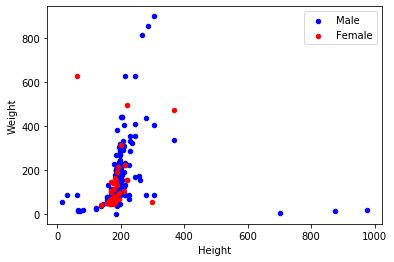

In [18]:
#MALE AND FEMALE HEIGHT x WEIGHT SCATTER
ax = male_hero_df.plot.scatter(x='Height', y='Weight', color='blue', label='Male')
female_hero_df.plot.scatter(x='Height', y='Weight', color='red', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [19]:
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()

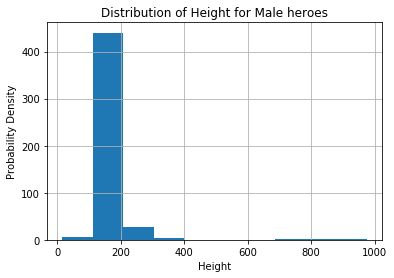

In [20]:
# Male Height
show_distplot(male_hero_df,'Male','Height')

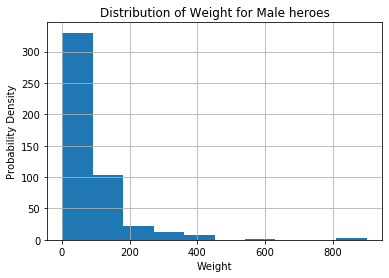

In [21]:
# Male Weight
show_distplot(male_hero_df,'Male','Weight')

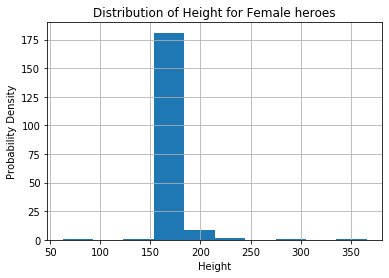

In [22]:
# Female Height
show_distplot(female_hero_df,'Female','Height')

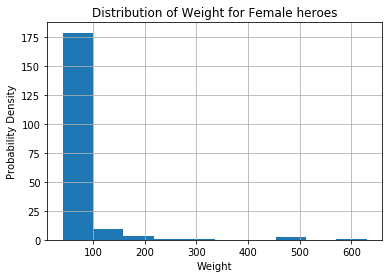

In [23]:
# Female Weight
show_distplot(female_hero_df,'Female','Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
On average, males are 42 kg heavier and 17 cm taller than females.
Mean value for male height and weight are 190cm and 115 kg
Mean value for female height and weight are 173c, and 73 kg
The distribution for both sexes are skewed to the right, with height and weight outliers


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Text(0.5, 0, 'POWERS')

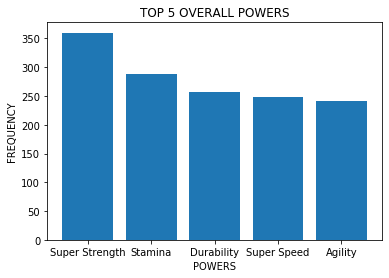

In [24]:
#REPLACING TRUE AND FALSE WITH 1 AND 0 
#FOR SOME REASON DID NOT WORK WITHOUT DOING THAT
powers_df = powers_df.replace('True',1)
powers_df = powers_df.replace('False',0)
#SUM OF POWERS
power_sums = powers_df.sum()
#DROPPED NAME COLUMN SO SORT FUNCTION COULD WORK
power_sums.drop('name', inplace=True)
power_sums.sort_values(ascending=False, inplace=True)
#CREATING TOP 5 DICTIONARY OF MOST COMMON POWERS OVERALL
top5 = power_sums.iloc[:5]
top5= dict(top5)
#GRAPHING DATA
x = list(top5.keys())
y = list(top5.values())
plt.bar(x,y)
plt.title('TOP 5 OVERALL POWERS')
plt.ylabel('FREQUENCY')
plt.xlabel('POWERS')
    

In [25]:
#CREATED DATAFRAME WITH ONLY MARVEL HEROES
Marvel_powers_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
#RESET INDEX TO REMOVE UNECESSARY COLUMNS SUCH AS NAME,GENDER, RACE, ETC...
Marvel_powers_df = Marvel_powers_df.reset_index()
Marvel_powers_df.drop(['name','Gender','Race','Eye color','Height','Skin color','Weight','Alignment','Hair color','Publisher'], axis = 1, inplace= True)

Text(0.5, 0, 'POWERS')

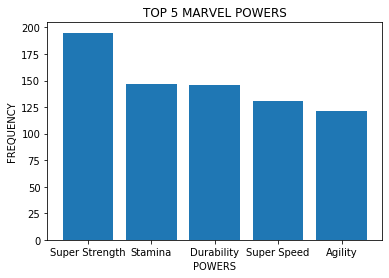

In [26]:
#REPLACED TRUE AND FALSE WITH 1 AND 0
Marvel_powers_df = Marvel_powers_df.replace('True',1)
Marvel_powers_df = Marvel_powers_df.replace('False',0)
#SUM OF MARVEL POWERS AND SORTING
Marvel_powers_sums = Marvel_powers_df.sum()
Marvel_powers_sums.sort_values(ascending=False, inplace=True)
#GETTING TOP 5 MARVEL POWERS
Marvel_top5 = Marvel_powers_sums.iloc[:5]
Marvel_top5= dict(Marvel_top5)
#GRAPHING TOP 5 MARVEL POWERS
x_2 = list(Marvel_top5.keys())
y_2 = list(Marvel_top5.values())
plt.bar(x_2,y_2)
plt.title('TOP 5 MARVEL POWERS')
plt.ylabel('FREQUENCY')
plt.xlabel('POWERS')

In [27]:
#CREATED DATAFRAME WITH ONLY DC HEROES
DC_powers_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
#RESET INDEX TO REMOVE UNECESSARY COLUMNS SUCH AS NAME,GENDER, RACE, ETC...
DC_powers_df = DC_powers_df.reset_index()
DC_powers_df.drop(['name','Gender','Race','Eye color','Height','Skin color','Weight','Alignment','Hair color','Publisher'], axis = 1, inplace= True)

Text(0.5, 0, 'POWERS')

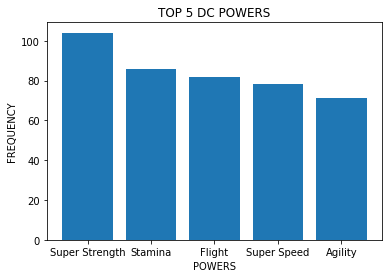

In [28]:
#REPLACED TRUE AND FALSE WITH 1 AND 0
DC_powers_df = DC_powers_df.replace('True',1)
DC_powers_df = DC_powers_df.replace('False',0)
#SUM OF DC POWERS AND SORTING
DC_powers_sums = DC_powers_df.sum()
DC_powers_sums.sort_values(ascending=False, inplace=True)
#GETTING TOP 5 DC POWERS
DC_top5 = DC_powers_sums.iloc[:5]
DC_top5= dict(DC_top5)
#GRAPHING TOP 5 DC POWERS
x_3 = list(DC_top5.keys())
y_3 = list(DC_top5.values())
plt.bar(x_3,y_3)
plt.title('TOP 5 DC POWERS')
plt.ylabel('FREQUENCY')
plt.xlabel('POWERS')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________ The top 5 powers are very similar with the exception of durability/flight. Flight is much more common that durability in the DC universe. Top 5 Marvel powers are the same as the Top 5 Overall. That may be because the majority of heroes are from the Marvel Universe.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [29]:
#alien_heroes_df = heroes_df[heroes_df['Race'] == 'Alien']

In [30]:
#len(heroes_df[heroes_df['Race']=='Alien'])

In [31]:
heroes_df['Powers_Qty'] = powers_df.sum(axis = 1)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Powers_Qty
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,4.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,7.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,16.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,1.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,NaN
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,NaN
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,NaN
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,NaN


In [32]:
#powers_df.corr()[['Powers_Qty','Height','Weight']]
#heroes_and_powers_df

In [33]:
heroes_and_powers_df_2 = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df_2

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Powers_Qty
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,0,1,0,0,0,1,0,0,0,0,...,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,4.0
Abe Sapien,1,1,0,0,1,1,0,0,0,0,...,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,7.0
Abin Sur,0,0,1,0,0,0,0,0,0,0,...,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,16.0
Abomination,0,1,0,0,0,0,0,0,0,0,...,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,1.0
Abraxas,0,0,0,1,0,0,0,0,1,0,...,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,0,0,0,0,0,0,0,0,1,0,...,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,NaN
Ymir,0,0,0,0,1,1,0,0,0,0,...,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,NaN
Yoda,1,0,0,0,0,0,1,0,0,1,...,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,NaN


In [34]:
heroes_and_powers_df_2.corr()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Height,Weight,Powers_Qty
Agility,1.000000,0.278347,0.023376,0.029547,0.101915,0.129901,0.392200,0.043308,-0.007771,0.246840,...,0.112730,0.051838,0.051838,-0.030379,0.051838,0.015186,0.015186,0.147158,0.135855,-0.030069
Accelerated Healing,0.278347,1.000000,-0.029804,0.124376,0.137623,0.252427,0.107717,0.159887,0.124548,0.262185,...,0.173110,0.063162,-0.024933,0.063162,0.063162,0.089396,0.089396,0.090278,0.146304,-0.002121
Lantern Power Ring,0.023376,-0.029804,1.000000,-0.026835,-0.037904,-0.009260,-0.064961,-0.048507,0.140127,-0.031035,...,-0.016768,-0.005265,-0.005265,-0.005265,-0.005265,-0.007451,-0.007451,-0.000793,0.009656,0.000083
Dimensional Awareness,0.029547,0.124376,-0.026835,1.000000,-0.057794,-0.048684,0.044354,0.126738,0.136636,0.025639,...,0.039474,-0.008027,-0.008027,-0.008027,-0.008027,0.277665,0.277665,-0.022923,-0.032976,0.011163
Cold Resistance,0.101915,0.137623,-0.037904,-0.057794,1.000000,0.266406,0.056018,0.061636,-0.045119,0.013672,...,0.011736,-0.011338,-0.011338,-0.011338,-0.011338,-0.016047,-0.016047,0.032400,0.141636,-0.032724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Omnipresent,0.015186,0.089396,-0.007451,0.277665,-0.016047,0.011728,-0.027502,0.153611,0.021136,0.113475,...,-0.007099,-0.002229,-0.002229,-0.002229,-0.002229,1.000000,1.000000,-0.092058,-0.066976,-0.062493
Omniscient,0.015186,0.089396,-0.007451,0.277665,-0.016047,0.011728,-0.027502,0.153611,0.021136,0.113475,...,-0.007099,-0.002229,-0.002229,-0.002229,-0.002229,1.000000,1.000000,-0.092058,-0.066976,-0.062493
Height,0.147158,0.090278,-0.000793,-0.022923,0.032400,0.221984,0.021802,-0.010846,0.039225,0.047102,...,0.050639,0.018999,0.014529,-0.065043,0.021383,-0.092058,-0.092058,1.000000,0.635144,-0.062570
Weight,0.135855,0.146304,0.009656,-0.032976,0.141636,0.300568,-0.017318,-0.023430,-0.006511,0.018651,...,0.079228,0.009333,-0.001573,-0.047322,0.029632,-0.066976,-0.066976,0.635144,1.000000,-0.090137


In [35]:
#There is no correlation between the number of powers and height or weight
#Power_qty and Height corrolation is -0.06
#Power_qty and Weight corrolation is 0.09

Text(0.5, 0, 'Alien Skin Color')

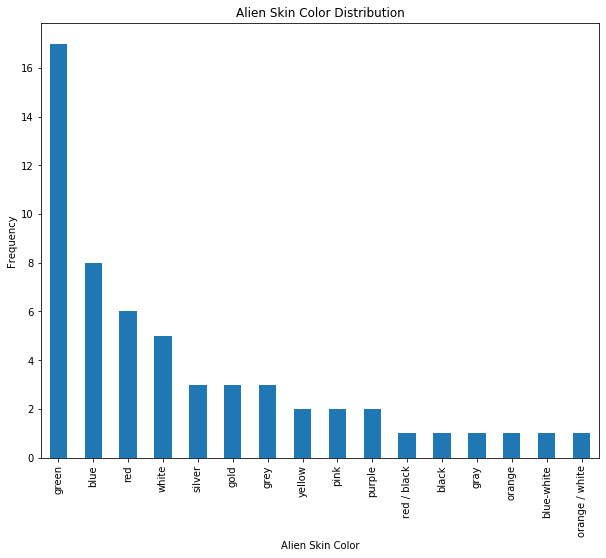

In [80]:
Alien_heroes_df = heroes_df[(heroes_df['Race'] != 'Human') & (heroes_df['Race'] != '-') & (heroes_df['Race'] != 'Cyborg')
                           & (heroes_df['Race'] != 'Human / Radiation')& (heroes_df['Race'] != 'Andriod')
                            & (heroes_df['Race'] != 'Gorilla')]
Alien_heroes_df = Alien_heroes_df[Alien_heroes_df['Skin color'] != '-']
Alien_heroes_df['Skin color'].value_counts().plot(kind = 'bar',figsize = (10,8))
plt.title('Alien Skin Color Distribution')
plt.ylabel('Frequency')
plt.xlabel('Alien Skin Color')

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data